In [5]:
import matplotlib.pyplot as plt
import numpy as np

N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes

X = np.zeros((N*K,D)) # data matrix (each row = single example)
print(X.shape)
y = np.zeros(N*K, dtype='uint8') # class labels
print(y.shape)

(300, 2)
(300,)


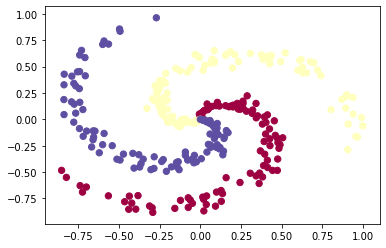

In [3]:
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [1]:
#Train a Linear Classifier

# initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in range(200):
  
  # evaluate class scores, [N x K]
  scores = np.dot(X, W) + b 
  
  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
  # compute the loss: average cross-entropy loss and regularization
  correct_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(correct_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W)
  loss = data_loss + reg_loss
  if i % 10 == 0:
    print("iteration %d: loss %f" % (i, loss))
  
  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples
  
  # backpropate the gradient to the parameters (W,b)
  dW = np.dot(X.T, dscores)
  db = np.sum(dscores, axis=0, keepdims=True)
  
  dW += reg*W # regularization gradient
  
  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db

<Figure size 640x480 with 1 Axes>

iteration 0: loss 1.099371
iteration 10: loss 0.900727
iteration 20: loss 0.827380
iteration 30: loss 0.794027
iteration 40: loss 0.776609
iteration 50: loss 0.766655
iteration 60: loss 0.760605
iteration 70: loss 0.756761
iteration 80: loss 0.754238
iteration 90: loss 0.752541
iteration 100: loss 0.751376
iteration 110: loss 0.750564
iteration 120: loss 0.749992
iteration 130: loss 0.749583
iteration 140: loss 0.749290
iteration 150: loss 0.749078
iteration 160: loss 0.748923
iteration 170: loss 0.748810
iteration 180: loss 0.748727
iteration 190: loss 0.748666
